In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import chi2_contingency, f_oneway

In [2]:
# load in csv file 
df = pd.read_csv("data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Examining Data ###

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing entries -> don't have to input any new data

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


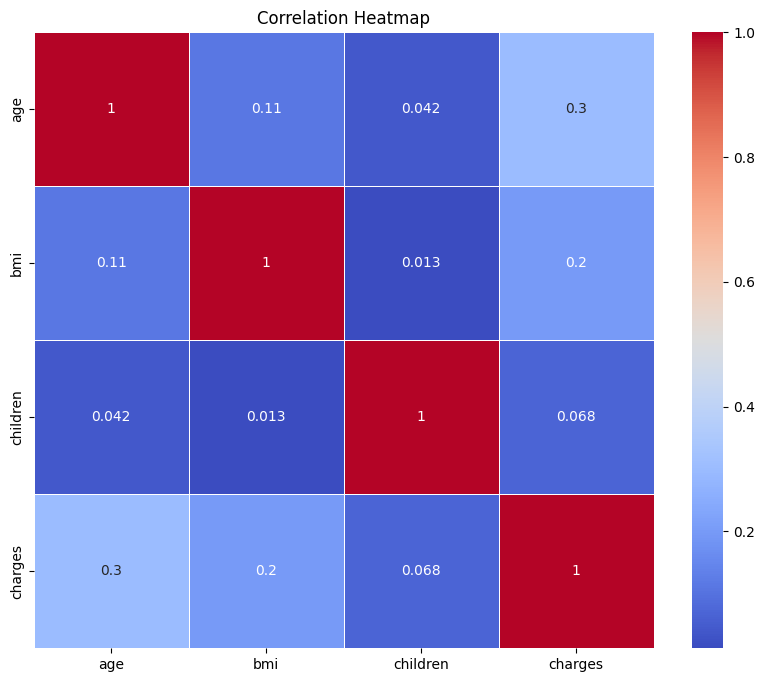

In [5]:
# building correlation matrix of numerical features 
df_numerical = df.select_dtypes(include = "number")
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

### Observations ###
There aren't any features that have a strong correlation with each other, so there is no need to remove any of the numerical features 

### Checking relationship between sex and smoker features ###

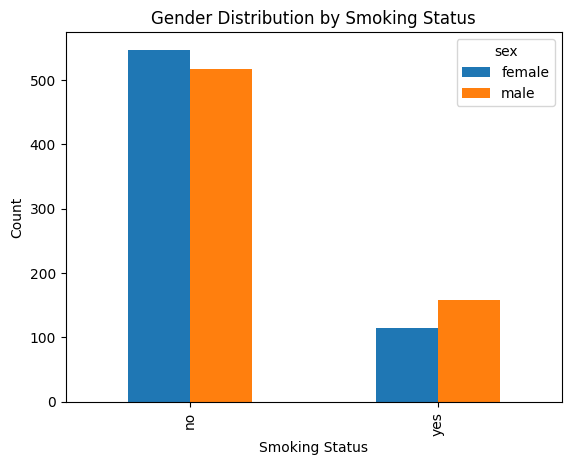

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
# Group the data by 'smoker' and 'gender' and count the occurrences
grouped = df.groupby(["smoker", "sex"]).size().unstack(fill_value=0)

# Plot the bar chart
grouped.plot(kind='bar', stacked=False)

# Customize the plot
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Gender Distribution by Smoking Status')

# Show the plot
plt.show()
df["sex"].value_counts()

### Observations ###
1. Number of Males and Females recorded are about the same 
2. Most Male and Females are not smokers 
3. For both yes and no in the smoker category, the amount for Males and Females are about the same

### Checking statistics for age feature ### 

In [7]:
fig = px.violin(df, y = "age", points = "all", box = True)
fig.show()

### Observations ###
1. Median age is 39 
2. Lowest age is 18, highest age is 64 

### Looking at Age vs Cost ###

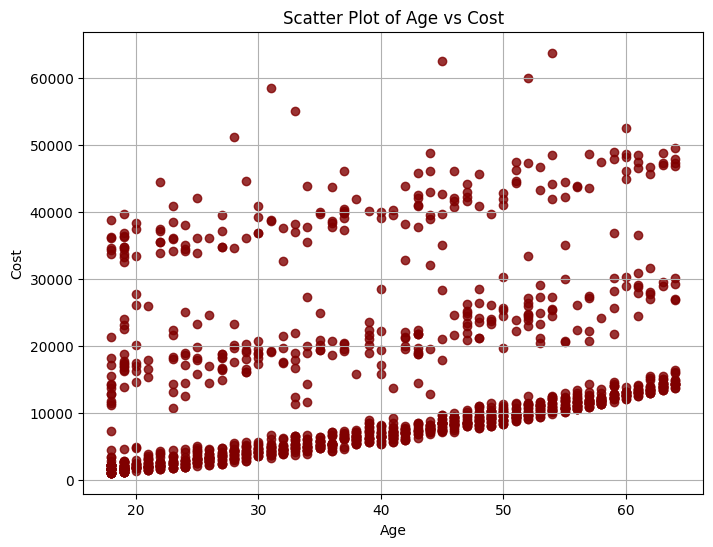

In [12]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["age"], df["charges"], color = "maroon", alpha = 0.8)
plt.title("Scatter Plot of Age vs Cost")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

### Observations ###
1. Average cost per age has a slight upward trend as age increases 

### Looking at Number of Children vs Cost ###

In [14]:
# most people recorded have between 0-3 children
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

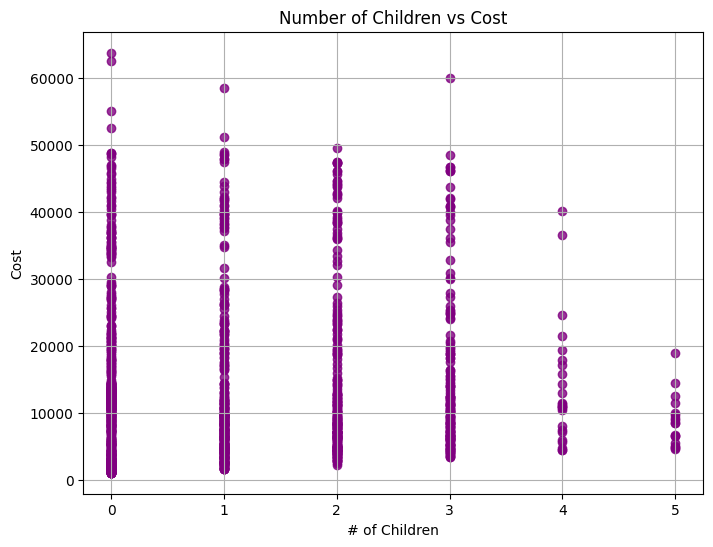

In [13]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["children"], df["charges"], color = "purple", alpha = 0.8)
plt.title("Number of Children vs Cost")
plt.xlabel("# of Children")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

### Observations ###
1. No conclusion can be made about Number of Children vs Cost

### Looking at Smokers vs Average Cost ### 

In [31]:
# The average cost of smokers charges is 4x higher than the average cost of non-smokers charges
mean_costs = df.groupby("smoker")["charges"].mean().reset_index()
mean_costs

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


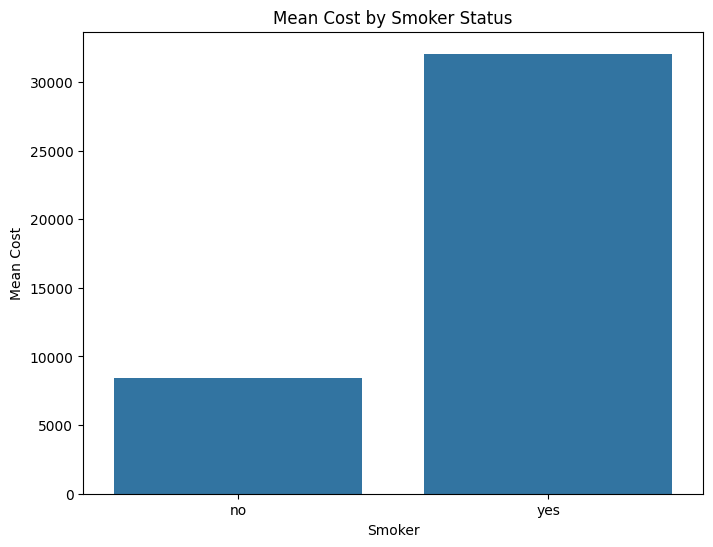

In [32]:
# Create a bar plot
plt.figure(figsize = (8, 6))
sns.barplot(x = "smoker", y = "charges", data = mean_costs)
plt.title("Mean Cost by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Mean Cost")
plt.show()

### Observation ###
1. Average cost of smokers charges is about 4x higher than the average cost of non-smokers charges

### Looking at Smokers vs BMI ###

In [38]:
#bmi_smokers = pd.DataFrame(df.groupby("smoker")["bmi"].mean())
bmi_smokers = df.groupby("smoker")["bmi"].mean().reset_index()
bmi_smokers

,smoker,bmi
0,no,30.651795
1,yes,30.708449


### Observation ### 
1. Average BMI of smokers and non-smokers are about the same 
2. In this dataset, a person's smoking habits doesn't have an impact on their BMI 